<a href="https://colab.research.google.com/github/Phamhoahoa/100-Days-Of-ML-Code/blob/master/Weekly_Project_BBC_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Organize ML projects with Scikit-Learn

While Machine Learning is powerful, people often overestimate it: apply machine learning to your project, and all your problems will be solved. In reality, it's not this simple. To be effective, one needs to organize the work very well. In this notebook, we will walkthrough practical aspects of a ML project. To look at the big picture, let's start with a checklist below. It should work reasonably well for most ML projects, but make sure to adapt it to your needs:

1. **Define the scope of work and objective**
    * How is your solution be used?
    * How should performance be measured? Are there any contraints?
    * How would the problem be solved manually?
    * List the available assumptions, and verify if possible.
    
    
2. **Get the data**
    * Document where you can get that data
    * Store data in a workspace you can easily access
    * Convert the data to a format you can easily manipulate
    * Check the overview (size, type, sample, description, statistics)
    * Data cleaning
    
    
3. **EDA & Data transformation**
    * Study each attribute and its characteristics (missing values, type of distribution, usefulness)
    * Visualize the data
    * Study the correlations between attributes
    * Feature selection, Feature Engineering, Feature scaling
    * Write functions for all data transformations
    
    
4. **Train models**
    * Automate as much as possible
    * Train promising models quickly using standard parameters. Measure and compare their performance
    * Analyze the errors the models make
    * Shortlist the top three of five most promising models, preferring models that make different types of errors.


5. **Fine-tunning**
    * Treat data transformation choices as hyperparameters, expecially when you are not sure about them (e.g., replace missing values with zeros or with the median value)
    * Unless there are very few hyperparameter value to explore, prefer random search over grid search.
    * Try ensemble methods
    * Test your final model on the test set to estimate the generalizaiton error. Don't tweak your model again, you would start overfitting the test set.

## Example: Articles categorization

### Objectives

Build a model to determine the categories of articles. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Get Data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [4]:
bbc = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/bbc-text.csv')

In [5]:
bbc.sample(5)

,category,text
1993,business,parmalat bank barred from suing bank of americ...
929,tech,casual gaming to take off games aimed at ca...
2060,sport,wenger dejected as arsenal slump arsenal manag...
773,sport,blackburn v burnley ewood park tuesday 1 mar...
1652,entertainment,duran duran show set for us tv chart stars dur...


### EDA & Data transformation**

In [6]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [8]:
# Your code here
set(bbc['category'])

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [9]:
bbc.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,progress on new internet domains by early 2005...
freq,511,2


In [10]:
bbc = bbc.drop_duplicates()
len(bbc)

2126

In [13]:
category = bbc.groupby('category', as_index= False).size()
category

,category,size
0,business,503
1,entertainment,369
2,politics,403
3,sport,504
4,tech,347


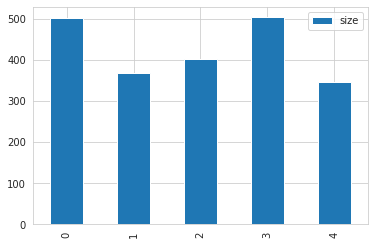

In [17]:
category.plot.bar()

In [33]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import  numpy, textblob, string
from keras.preprocessing import text, sequence


In [34]:
X = bbc['text'].to_list()
y= bbc['category'].to_list()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
tfidf_vect = TfidfVectorizer(analyzer='word',stop_words= 'english', max_features=30000)
tfidf_vect.fit(X_train)
X_data_tfidf =  tfidf_vect.transform(X_train)
X_test_tfidf =  tfidf_vect.transform(X_test)
print(X_train_tfidf.shape)

(1700, 26774)


### Train models with SVM, MultinomialNB, LogisticRegression, RandomForest 

In [52]:
pd.set_option('display.max_rows', None)
def train_model(classifier, X_data, y_data, X_test, y_test):       
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.1, random_state=42)
    result = pd.DataFrame(columns=['predict','category'])
    classifier.fit(X_train, y_train)
    train_predictions = classifier.predict(X_train)
    val_predictions = classifier.predict(X_val)
    test_predictions = classifier.predict(X_test)
    result['predict'] = test_predictions
    result['category'] = y_test
    print(result[0:20])
    print("Validation accuracy: ", metrics.accuracy_score(val_predictions, y_val))
    print("Test accuracy: ", metrics.accuracy_score(test_predictions, y_test))

#### MultinomialNB

In [53]:
train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)

          predict       category
0        politics       politics
1        business       business
2           sport          sport
3           sport          sport
4        business       business
5   entertainment  entertainment
6            tech           tech
7           sport          sport
8        politics       politics
9            tech           tech
10          sport          sport
11       politics       politics
12          sport          sport
13           tech           tech
14       business       business
15       business       business
16          sport          sport
17       politics       politics
18       politics       politics
19       business       business
Validation accuracy:  0.9588235294117647
Test accuracy:  0.9647887323943662


#### LogisticRegression

In [54]:
train_model(linear_model.LogisticRegression(C=1), X_train_tfidf, y_train, X_test_tfidf, y_test)

          predict       category
0        politics       politics
1        business       business
2           sport          sport
3           sport          sport
4        business       business
5   entertainment  entertainment
6            tech           tech
7           sport          sport
8        politics       politics
9            tech           tech
10          sport          sport
11       politics       politics
12          sport          sport
13           tech           tech
14       business       business
15       business       business
16          sport          sport
17       politics       politics
18       politics       politics
19       business       business
Validation accuracy:  0.9647058823529412
Test accuracy:  0.9765258215962441


#### SVM

In [55]:
train_model(svm.SVC(C=1),X_train_tfidf, y_train, X_test_tfidf, y_test)

          predict       category
0        politics       politics
1        business       business
2           sport          sport
3           sport          sport
4        business       business
5   entertainment  entertainment
6            tech           tech
7           sport          sport
8        politics       politics
9            tech           tech
10          sport          sport
11       politics       politics
12          sport          sport
13           tech           tech
14       business       business
15       business       business
16          sport          sport
17       politics       politics
18       politics       politics
19       business       business
Validation accuracy:  0.9647058823529412
Test accuracy:  0.9765258215962441


#### RandomForest

In [56]:
train_model(ensemble.RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)

          predict       category
0        politics       politics
1        business       business
2           sport          sport
3           sport          sport
4        business       business
5   entertainment  entertainment
6            tech           tech
7           sport          sport
8        politics       politics
9            tech           tech
10          sport          sport
11       politics       politics
12          sport          sport
13           tech           tech
14       business       business
15       business       business
16          sport          sport
17       politics       politics
18       politics       politics
19       business       business
Validation accuracy:  0.9823529411764705
Test accuracy:  0.9553990610328639


### Fine-tunning model SVM, find c =100

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(linear_model.LogisticRegression(penalty='l2'), param_grid)
clf.fit(X_train_tfidf, y_train)
print('Best score:', clf.best_score_)
print("Best parameter_gram:",clf.best_params_)

Best score: 0.9764705882352942
Best parameter_gram: {'C': 100}


In [58]:
train_model(svm.SVC(C=100),X_train_tfidf, y_train, X_test_tfidf, y_test)

          predict       category
0        politics       politics
1        business       business
2           sport          sport
3           sport          sport
4        business       business
5   entertainment  entertainment
6            tech           tech
7           sport          sport
8        politics       politics
9            tech           tech
10          sport          sport
11       politics       politics
12          sport          sport
13           tech           tech
14       business       business
15       business       business
16          sport          sport
17       politics       politics
18       politics       politics
19       business       business
Validation accuracy:  0.9705882352941176
Test accuracy:  0.9788732394366197
